In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#https://www.kaggle.com/datasets/laurabarreda/spotify-tracks-by-genre-8-genres-classification
df_sel_genres = pd.read_csv('/Users/alexvalles/spotify_all_genres_tracks.csv')
df_sel_genres

,track_id,playlist_url,playlist_name,track_name,track_popularity,artist_name,album,album_cover,artist_genres,artist_popularity,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,4Gia17DzXBhYFbYiJj6SyW,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Working Man,51,Otis Rush,Mourning In The Morning,https://i.scdn.co/image/ab67616d0000b273fea221...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0436,0.492000,0.000418,0.204,0.841,103.355,147800,4,blues
1,1BjYNhg7JhVfQdxqEThBwn,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Long Way Home,38,"Clarence ""Gatemouth"" Brown",Long Way Home,https://i.scdn.co/image/ab67616d0000b2730e1f13...,"['blues', 'blues rock', 'memphis blues', 'mode...",33,...,0,0.0380,0.910000,0.048000,0.120,0.425,78.033,338333,4,blues
2,2Cg3GUkhjX96nO4p2WRlIa,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,She's A Sweet One,49,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...",https://i.scdn.co/image/ab67616d0000b27399b18c...,"['blues', 'blues rock', 'chicago blues', 'elec...",41,...,1,0.0542,0.150000,0.026500,0.202,0.713,122.863,181786,4,blues
3,5bC6ONDsL88snGN6QasjZH,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Help Me,59,Sonny Boy Williamson II,More Real Folk Blues,https://i.scdn.co/image/ab67616d0000b273b48c81...,"['acoustic blues', 'blues', 'blues rock', 'chi...",46,...,0,0.0430,0.597000,0.021300,0.610,0.771,114.216,188200,4,blues
4,2TKykeHeVKsBqZC8M3SKcN,https://open.spotify.com/playlist/7qACZGMjyo64...,The Sound of Blues,Take Out Some Insurance,51,Jimmy Reed,Rockin' With Reed,https://i.scdn.co/image/ab67616d0000b2739b7573...,"['blues', 'blues rock', 'chicago blues', 'elec...",42,...,1,0.0513,0.663000,0.000000,0.122,0.566,111.330,143332,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9193,2oGYxgu2ztDaf64of4edww,https://open.spotify.com/playlist/50kZecUV5pY2...,The Sound of Techno,Walking with Clouds,17,Transllusion,The Opening of the Cerebral Gate,https://i.scdn.co/image/ab67616d0000b2730c430e...,"['electro', 'techno']",14,...,1,0.0531,0.000028,0.756000,0.111,0.235,135.338,212160,4,electronic
9194,2TbbgHiwZVjErsxkTm63Lh,https://open.spotify.com/playlist/50kZecUV5pY2...,The Sound of Techno,Start To Move,23,Oscar Mulero,Mannequin,https://i.scdn.co/image/ab67616d0000b273abfdcb...,"['minimal dub', 'minimal techno', 'spanish tec...",27,...,1,0.1080,0.006870,0.939000,0.121,0.417,133.987,317483,3,electronic
9195,0Rwl08UX8lNW6Cn8eb068P,https://open.spotify.com/playlist/50kZecUV5pY2...,The Sound of Techno,Take Me Away - Truncate Remix,7,DJ 3000,Take Me Away,https://i.scdn.co/image/ab67616d0000b273371dce...,"['detroit techno', 'techno']",7,...,0,0.0506,0.000020,0.939000,0.117,0.181,130.012,355586,4,electronic
9196,1M33B7EKfhIx3xtEYjnoKz,https://open.spotify.com/playlist/50kZecUV5pY2...,The Sound of Techno,Funny,24,Mr. De',Follow the Leader 4,https://i.scdn.co/image/ab67616d0000b273ba561d...,"['electro', 'ghettotech', 'techno']",27,...,0,0.0743,0.027900,0.860000,0.112,0.687,147.998,236333,4,electronic


In [4]:
df_sel_genres.columns

Index(['track_id', 'playlist_url', 'playlist_name', 'track_name',
       'track_popularity', 'artist_name', 'album', 'album_cover',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature',
       'genre'],
      dtype='object')

In [5]:
df_sel_genres = df_sel_genres.drop(['track_id', 'playlist_url', 'playlist_name',
                                   'track_popularity','album_cover','artist_popularity',
                                   'mode', 'duration_ms'], axis=1)
df_sel_genres

,track_name,artist_name,album,artist_genres,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,Working Man,Otis Rush,Mourning In The Morning,"['blues', 'blues rock', 'chicago blues', 'elec...",0.633,0.625,0,-10.951,0.0436,0.492000,0.000418,0.204,0.841,103.355,4,blues
1,Long Way Home,"Clarence ""Gatemouth"" Brown",Long Way Home,"['blues', 'blues rock', 'memphis blues', 'mode...",0.728,0.054,11,-22.557,0.0380,0.910000,0.048000,0.120,0.425,78.033,4,blues
2,She's A Sweet One,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...","['blues', 'blues rock', 'chicago blues', 'elec...",0.705,0.483,1,-12.209,0.0542,0.150000,0.026500,0.202,0.713,122.863,4,blues
3,Help Me,Sonny Boy Williamson II,More Real Folk Blues,"['acoustic blues', 'blues', 'blues rock', 'chi...",0.745,0.436,5,-9.617,0.0430,0.597000,0.021300,0.610,0.771,114.216,4,blues
4,Take Out Some Insurance,Jimmy Reed,Rockin' With Reed,"['blues', 'blues rock', 'chicago blues', 'elec...",0.747,0.288,9,-14.435,0.0513,0.663000,0.000000,0.122,0.566,111.330,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9193,Walking with Clouds,Transllusion,The Opening of the Cerebral Gate,"['electro', 'techno']",0.781,0.640,1,-9.453,0.0531,0.000028,0.756000,0.111,0.235,135.338,4,electronic
9194,Start To Move,Oscar Mulero,Mannequin,"['minimal dub', 'minimal techno', 'spanish tec...",0.717,0.833,1,-9.147,0.1080,0.006870,0.939000,0.121,0.417,133.987,3,electronic
9195,Take Me Away - Truncate Remix,DJ 3000,Take Me Away,"['detroit techno', 'techno']",0.716,0.653,9,-11.225,0.0506,0.000020,0.939000,0.117,0.181,130.012,4,electronic
9196,Funny,Mr. De',Follow the Leader 4,"['electro', 'ghettotech', 'techno']",0.763,0.451,1,-10.230,0.0743,0.027900,0.860000,0.112,0.687,147.998,4,electronic


In [6]:
# Recuento de valores para cada género
recuento_generos = df_sel_genres['genre'].value_counts()

print(recuento_generos)

genre
electronic    1725
pop           1251
rock          1134
reggae        1038
blues         1034
hiphop        1024
jazz          1002
classical      990
Name: count, dtype: int64


In [7]:
df_sel_genres.dtypes

track_name           object
artist_name          object
album                object
artist_genres        object
danceability        float64
energy              float64
key                   int64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
genre                object
dtype: object

In [8]:
df_sel_genres.isnull().sum()

track_name          0
artist_name         0
album               0
artist_genres       0
danceability        0
energy              0
key                 0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
genre               0
dtype: int64

In [9]:
duplicados = df_sel_genres[df_sel_genres.duplicated('track_name', keep=False)]


print("Tracks Duplicados:")
print(duplicados[['track_name', 'artist_name']])

Tracks Duplicados:
                 track_name              artist_name
3                   Help Me  Sonny Boy Williamson II
5         The Sky Is Crying             Elmore James
6             All Your Love                Magic Sam
9     I Can't Quit You Baby             Willie Dixon
13         Wang Dang Doodle              Koko Taylor
...                     ...                      ...
9079            Think Twice             Claude Young
9101            The Warning              Dark Energy
9105         Collard Greens                 Mad Mike
9156            Black Water               Octave One
9171            The Warning          Suburban Knight

[1206 rows x 2 columns]


In [10]:
conteo_duplicados = df_sel_genres['track_name'].value_counts()

# Filtrar solo las que tienen más de una ocurrencia (son duplicados)
duplicados_contados = conteo_duplicados[conteo_duplicados > 1]

# Imprimir el conteo de duplicados
print("Conteo de TrackName Duplicados:")
duplicados_contados

Conteo de TrackName Duplicados:


track_name
Stardust                    7
Summertime                  5
Body And Soul               5
Sweet Home Chicago          5
There Is No Greater Love    5
                           ..
September In The Rain       2
April In Paris              2
Rollin' And Tumblin'        2
Night And Day               2
Bang Bang                   2
Name: count, Length: 538, dtype: int64

In [11]:
df_def = df_sel_genres.drop_duplicates(subset=['track_name', 'artist_name'], keep='first')

# Imprimir el DataFrame sin duplicados
print("DataFrame sin Duplicados:")
df_def

DataFrame sin Duplicados:


,track_name,artist_name,album,artist_genres,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,Working Man,Otis Rush,Mourning In The Morning,"['blues', 'blues rock', 'chicago blues', 'elec...",0.633,0.625,0,-10.951,0.0436,0.492000,0.000418,0.204,0.841,103.355,4,blues
1,Long Way Home,"Clarence ""Gatemouth"" Brown",Long Way Home,"['blues', 'blues rock', 'memphis blues', 'mode...",0.728,0.054,11,-22.557,0.0380,0.910000,0.048000,0.120,0.425,78.033,4,blues
2,She's A Sweet One,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...","['blues', 'blues rock', 'chicago blues', 'elec...",0.705,0.483,1,-12.209,0.0542,0.150000,0.026500,0.202,0.713,122.863,4,blues
3,Help Me,Sonny Boy Williamson II,More Real Folk Blues,"['acoustic blues', 'blues', 'blues rock', 'chi...",0.745,0.436,5,-9.617,0.0430,0.597000,0.021300,0.610,0.771,114.216,4,blues
4,Take Out Some Insurance,Jimmy Reed,Rockin' With Reed,"['blues', 'blues rock', 'chicago blues', 'elec...",0.747,0.288,9,-14.435,0.0513,0.663000,0.000000,0.122,0.566,111.330,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9193,Walking with Clouds,Transllusion,The Opening of the Cerebral Gate,"['electro', 'techno']",0.781,0.640,1,-9.453,0.0531,0.000028,0.756000,0.111,0.235,135.338,4,electronic
9194,Start To Move,Oscar Mulero,Mannequin,"['minimal dub', 'minimal techno', 'spanish tec...",0.717,0.833,1,-9.147,0.1080,0.006870,0.939000,0.121,0.417,133.987,3,electronic
9195,Take Me Away - Truncate Remix,DJ 3000,Take Me Away,"['detroit techno', 'techno']",0.716,0.653,9,-11.225,0.0506,0.000020,0.939000,0.117,0.181,130.012,4,electronic
9196,Funny,Mr. De',Follow the Leader 4,"['electro', 'ghettotech', 'techno']",0.763,0.451,1,-10.230,0.0743,0.027900,0.860000,0.112,0.687,147.998,4,electronic


In [12]:
df_def = df_def.reset_index(drop=True)
df_def

,track_name,artist_name,album,artist_genres,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,Working Man,Otis Rush,Mourning In The Morning,"['blues', 'blues rock', 'chicago blues', 'elec...",0.633,0.625,0,-10.951,0.0436,0.492000,0.000418,0.204,0.841,103.355,4,blues
1,Long Way Home,"Clarence ""Gatemouth"" Brown",Long Way Home,"['blues', 'blues rock', 'memphis blues', 'mode...",0.728,0.054,11,-22.557,0.0380,0.910000,0.048000,0.120,0.425,78.033,4,blues
2,She's A Sweet One,Junior Wells,"Calling All Blues - The Chief, Profile & USA R...","['blues', 'blues rock', 'chicago blues', 'elec...",0.705,0.483,1,-12.209,0.0542,0.150000,0.026500,0.202,0.713,122.863,4,blues
3,Help Me,Sonny Boy Williamson II,More Real Folk Blues,"['acoustic blues', 'blues', 'blues rock', 'chi...",0.745,0.436,5,-9.617,0.0430,0.597000,0.021300,0.610,0.771,114.216,4,blues
4,Take Out Some Insurance,Jimmy Reed,Rockin' With Reed,"['blues', 'blues rock', 'chicago blues', 'elec...",0.747,0.288,9,-14.435,0.0513,0.663000,0.000000,0.122,0.566,111.330,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8977,Walking with Clouds,Transllusion,The Opening of the Cerebral Gate,"['electro', 'techno']",0.781,0.640,1,-9.453,0.0531,0.000028,0.756000,0.111,0.235,135.338,4,electronic
8978,Start To Move,Oscar Mulero,Mannequin,"['minimal dub', 'minimal techno', 'spanish tec...",0.717,0.833,1,-9.147,0.1080,0.006870,0.939000,0.121,0.417,133.987,3,electronic
8979,Take Me Away - Truncate Remix,DJ 3000,Take Me Away,"['detroit techno', 'techno']",0.716,0.653,9,-11.225,0.0506,0.000020,0.939000,0.117,0.181,130.012,4,electronic
8980,Funny,Mr. De',Follow the Leader 4,"['electro', 'ghettotech', 'techno']",0.763,0.451,1,-10.230,0.0743,0.027900,0.860000,0.112,0.687,147.998,4,electronic


In [13]:
df_def.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000,8982.000000
mean,0.595887,0.537453,5.368403,-10.679383,0.084689,0.360143,0.227598,0.170531,0.502754,116.672555,3.898241
std,0.192517,0.273340,3.560725,6.544237,0.081838,0.368471,0.350803,0.139560,0.265617,29.172002,0.400283
min,0.000000,0.000885,0.000000,-47.001000,0.000000,0.000002,0.000000,0.018200,0.000000,0.000000,0.000000
25%,0.474000,0.335000,2.000000,-13.204250,0.038200,0.030100,0.000002,0.090300,0.282000,94.016500,4.000000
50%,0.622000,0.580500,6.000000,-8.754000,0.048900,0.187500,0.001655,0.116000,0.518000,117.994500,4.000000
75%,0.744000,0.759000,8.000000,-6.127250,0.087375,0.728000,0.463000,0.198000,0.724000,132.697250,4.000000
max,0.984000,0.999000,11.000000,1.342000,0.827000,0.996000,0.983000,0.979000,0.986000,216.090000,5.000000


In [14]:
df_weights = df_def.drop(['track_name', 'artist_name', 'album', 'artist_genres'], axis=1)
df_weights

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre
0,0.633,0.625,0,-10.951,0.0436,0.492000,0.000418,0.204,0.841,103.355,4,blues
1,0.728,0.054,11,-22.557,0.0380,0.910000,0.048000,0.120,0.425,78.033,4,blues
2,0.705,0.483,1,-12.209,0.0542,0.150000,0.026500,0.202,0.713,122.863,4,blues
3,0.745,0.436,5,-9.617,0.0430,0.597000,0.021300,0.610,0.771,114.216,4,blues
4,0.747,0.288,9,-14.435,0.0513,0.663000,0.000000,0.122,0.566,111.330,4,blues
...,...,...,...,...,...,...,...,...,...,...,...,...
8977,0.781,0.640,1,-9.453,0.0531,0.000028,0.756000,0.111,0.235,135.338,4,electronic
8978,0.717,0.833,1,-9.147,0.1080,0.006870,0.939000,0.121,0.417,133.987,3,electronic
8979,0.716,0.653,9,-11.225,0.0506,0.000020,0.939000,0.117,0.181,130.012,4,electronic
8980,0.763,0.451,1,-10.230,0.0743,0.027900,0.860000,0.112,0.687,147.998,4,electronic


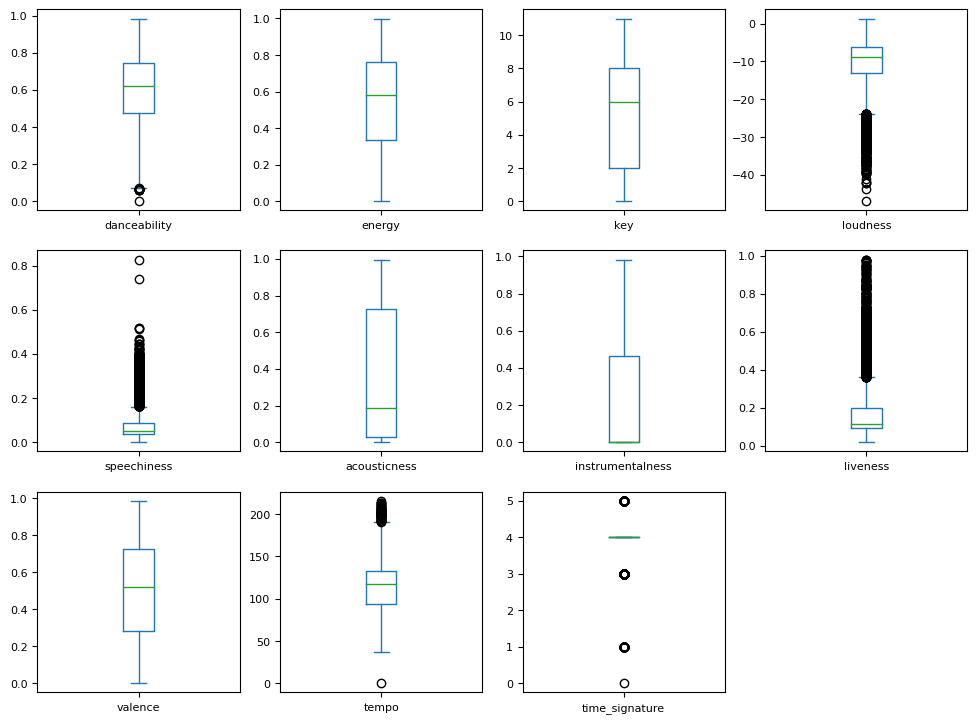

In [15]:
df_weights.plot(kind='box',subplots=True, layout=(4,4), fontsize=8, figsize=(12,12));

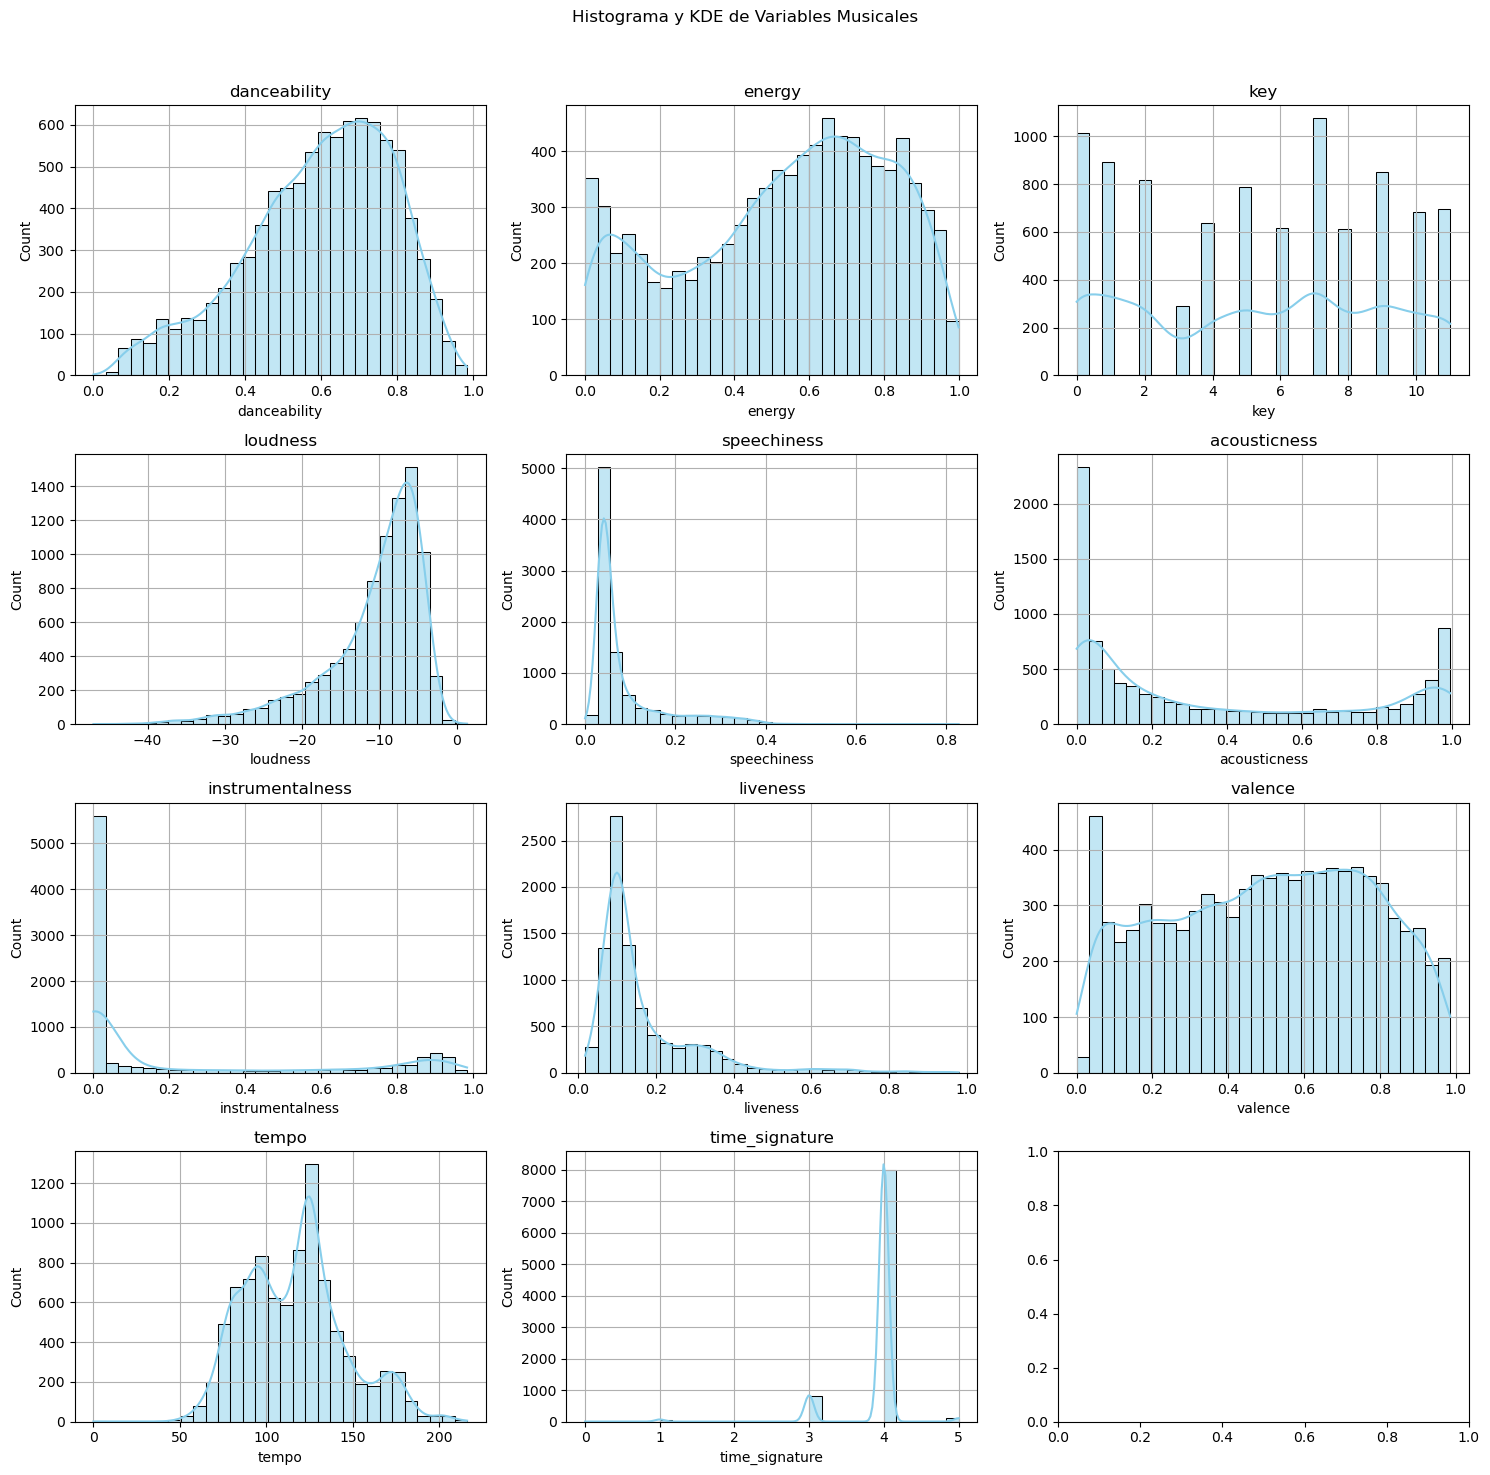

In [16]:
# Seleccionar las columnas numéricas para el histograma
columnas_numericas = df_weights.select_dtypes(include=['float64', 'int64'])

# Configurar el diseño del histograma
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.suptitle('Histograma y KDE de Variables Musicales')

# Crear histogramas y KDE para cada columna
for i, columna in enumerate(columnas_numericas.columns):
    sns.histplot(df_weights[columna], bins=30, kde=True, color='skyblue', edgecolor='black', ax=axs[i // 3, i % 3])
    axs[i // 3, i % 3].set_title(columna)
    axs[i // 3, i % 3].grid(True)

# Ajustar el diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [17]:
# TEST SHAPIRO

import pandas as pd
from scipy.stats import shapiro

columnas = ['danceability', 'energy', 'key', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Realizamos el test de Shapiro-Wilk para cada columna
for column in columnas:
    stat, p = shapiro(df_weights[column])
    print(f'Columna: {column}, Estadística: {stat:.3f}, p-valor: {p:.3f}')

Columna: danceability, Estadística: 0.969, p-valor: 0.000
Columna: energy, Estadística: 0.950, p-valor: 0.000
Columna: key, Estadística: 0.929, p-valor: 0.000
Columna: loudness, Estadística: 0.861, p-valor: 0.000
Columna: speechiness, Estadística: 0.668, p-valor: 0.000
Columna: acousticness, Estadística: 0.818, p-valor: 0.000
Columna: instrumentalness, Estadística: 0.653, p-valor: 0.000
Columna: liveness, Estadística: 0.725, p-valor: 0.000
Columna: valence, Estadística: 0.963, p-valor: 0.000
Columna: tempo, Estadística: 0.980, p-valor: 0.000
Columna: time_signature, Estadística: 0.377, p-valor: 0.000


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler


# Separar el DataFrame en características (X) y la variable objetivo (y)
X = df_weights.drop('genre', axis=1)  # Ajusta las columnas según tu conjunto de datos
y = df_weights['genre']

# Aplicar LabelEncoder a la variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Obtener los equivalentes originales y sus códigos
equivalentes_originales = le.classes_
codigos_asignados = le.transform(equivalentes_originales)

# Visualizar los equivalentes originales y sus códigos
for codigo, equivalente_original in zip(codigos_asignados, equivalentes_originales):
    print(f"Código: {codigo}, Equivalente Original: {equivalente_original}")


Código: 0, Equivalente Original: blues
Código: 1, Equivalente Original: classical
Código: 2, Equivalente Original: electronic
Código: 3, Equivalente Original: hiphop
Código: 4, Equivalente Original: jazz
Código: 5, Equivalente Original: pop
Código: 6, Equivalente Original: reggae
Código: 7, Equivalente Original: rock


In [20]:
# Suponiendo que tu DataFrame se llama 'df'
columnas_robust_scaler = ['danceability', 'loudness', 'speechiness', 'liveness', 'tempo', 'time_signature']
columnas_minmax_scaler = ['acousticness', 'instrumentalness', 'key', 'valence', 'energy']

# Inicializar los escaladores
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# Aplicar RobustScaler a las columnas correspondientes
X_train[columnas_robust_scaler] = robust_scaler.fit_transform(X_train[columnas_robust_scaler])
X_test[columnas_robust_scaler] = robust_scaler.transform(X_test[columnas_robust_scaler])

# Aplicar MinMaxScaler a las columnas correspondientes
X_train[columnas_minmax_scaler] = minmax_scaler.fit_transform(X_train[columnas_minmax_scaler])
X_test[columnas_minmax_scaler] = minmax_scaler.transform(X_test[columnas_minmax_scaler])


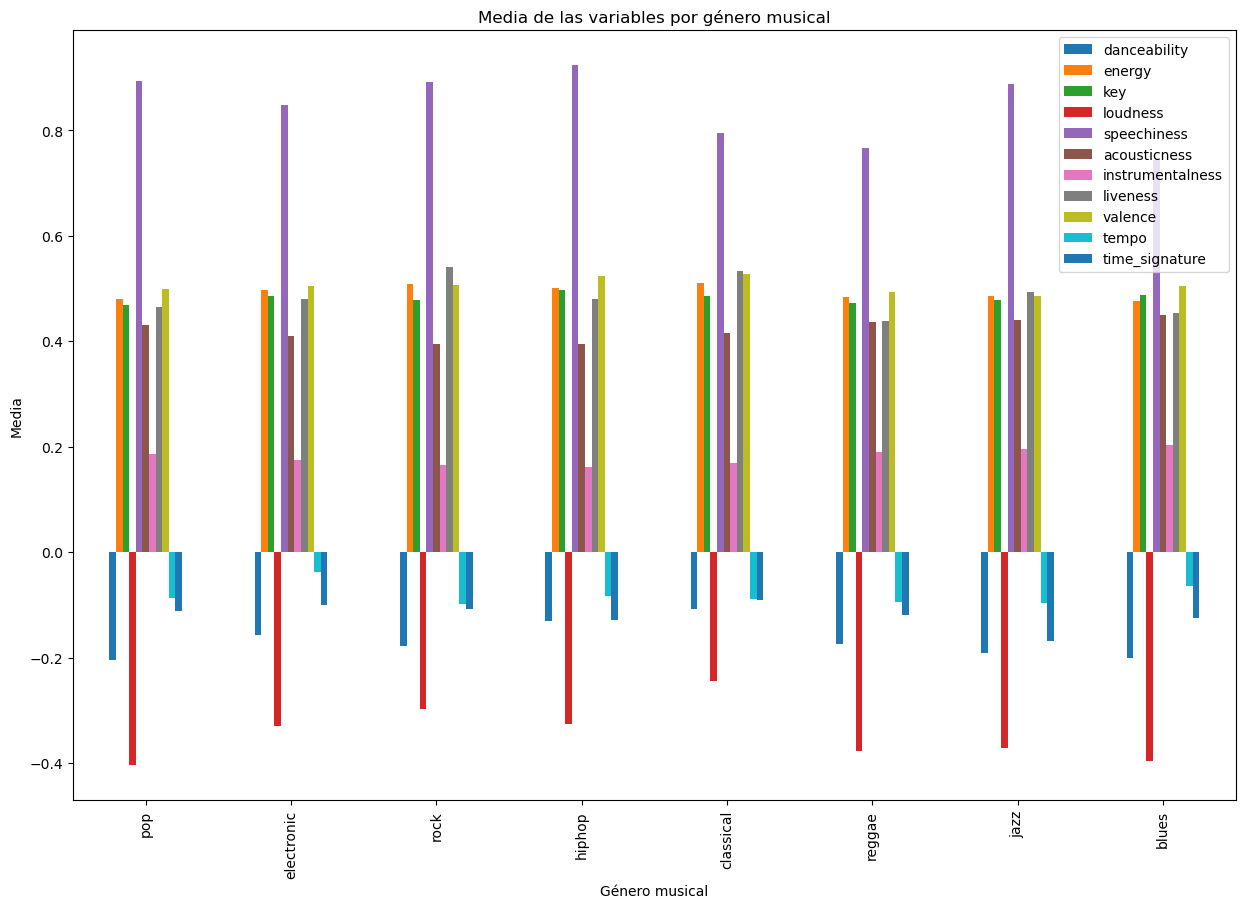

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Combina X_train y y_train en un solo DataFrame
df_train = pd.concat([X_train, pd.Series(y_train, name='genre')], axis=1)

# Elimina las filas con NaN en la columna 'genre'
df_train = df_train.dropna(subset=['genre'])

# Invierte la codificación de la columna de género para obtener los nombres de los géneros
df_train['genre'] = le.inverse_transform(df_train['genre'].astype(int))

# Crea un DataFrame vacío para almacenar las medias
df_medias = pd.DataFrame()

# Calcula la media de cada variable para cada género musical
for genero in df_train['genre'].unique():
    df_genero = df_train[df_train['genre'] == genero]
    # Solo calcula la media para las columnas numéricas
    columnas_numericas = df_genero.select_dtypes(include=[np.number]).columns
    media_genero = df_genero[columnas_numericas].mean()
    df_medias[genero] = media_genero

# Transpone el DataFrame para que los géneros sean las filas y las variables las columnas
df_medias = df_medias.transpose()


# Crea un gráfico de barras agrupado para cada variable
df_medias.plot(kind='bar', stacked=False, figsize=(15,10))
plt.title('Media de las variables por género musical')
plt.ylabel('Media')
plt.xlabel('Género musical')
plt.legend(loc='upper right')
plt.show()

Random Forest Classifier:

In [22]:
from sklearn.ensemble import RandomForestClassifier

#Creamos el clasificador de Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [23]:
# Entrenamos el modelo
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
from sklearn.metrics import classification_report


# Realizamos predicciones en el conjunto de prueba
y_pred_rf = rf_clf.predict(X_test)

# informe de clasificación
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.57      0.51      0.54       193
           1       0.90      0.83      0.86       200
           2       0.76      0.79      0.78       358
           3       0.71      0.73      0.72       198
           4       0.62      0.70      0.66       177
           5       0.59      0.65      0.62       239
           6       0.67      0.59      0.63       209
           7       0.67      0.65      0.66       223

    accuracy                           0.69      1797
   macro avg       0.69      0.68      0.68      1797
weighted avg       0.69      0.69      0.69      1797



In [25]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [26]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions_rf = {
    'n_estimators': [100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': [1, 2, 'sqrt'],
    'bootstrap': [True],
    'random_state': [42]
}




In [27]:
random_search_rf = RandomizedSearchCV(rf_clf, param_distributions_rf, n_iter=50, cv=5, scoring='accuracy', n_jobs=-1)


In [28]:
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None, 10],
                                        'max_features': [1, 2, 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100],
                                        'random_state': [42]},
                   scoring='accuracy')

In [29]:
# Imprimir los mejores parámetros encontrados
best_params_rf = random_search_rf.best_params_
print("Mejores hiperparámetros encontrados:", best_params_rf)

Mejores hiperparámetros encontrados: {'random_state': 42, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}


In [30]:
best_model_rf = random_search_rf.best_estimator_
y_pred_rf = best_model_rf.predict(X_test)


print("Informe de clasificación:\n", classification_report(y_test, y_pred_rf))

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.58      0.50      0.54       193
           1       0.91      0.83      0.87       200
           2       0.78      0.79      0.78       358
           3       0.69      0.75      0.72       198
           4       0.62      0.69      0.66       177
           5       0.60      0.64      0.62       239
           6       0.67      0.60      0.64       209
           7       0.63      0.65      0.64       223

    accuracy                           0.69      1797
   macro avg       0.69      0.68      0.68      1797
weighted avg       0.69      0.69      0.69      1797



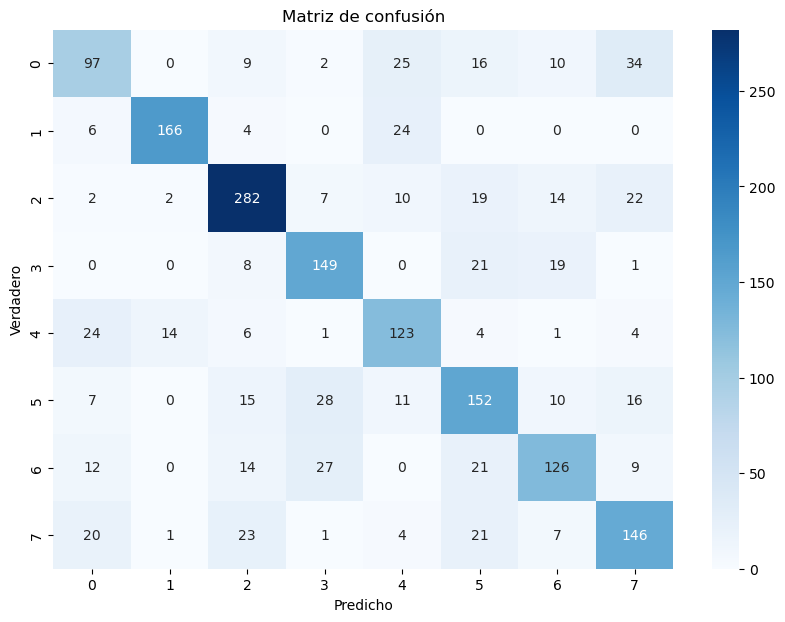

In [31]:
from sklearn.metrics import confusion_matrix


# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score

# Realizamos validación cruzada
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='accuracy')


print("Resultados de Validación Cruzada:")
print("Precisión en cada pliegue:", cv_scores_rf)
print("Precisión media:", cv_scores_rf.mean())
print("Desviación estándar de la precisión:", cv_scores_rf.std())

Resultados de Validación Cruzada:
Precisión en cada pliegue: [0.6993737  0.67014614 0.68336813 0.6861517  0.68267223]
Precisión media: 0.6843423799582463
Desviación estándar de la precisión: 0.009321866137586829


Aplicamos las predicciones a Dataset con 1.200.000 canciones aprox

In [33]:
df_spotify = pd.read_csv('/Users/alexvalles/tracks_features.csv')

df_spotify

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [34]:
df_spotify.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
dtype: object

In [35]:
df_spotify.describe()

,track_number,disc_number,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
count,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06,1.204025e+06
mean,7.656352e+00,1.055906e+00,4.930565e-01,5.095363e-01,5.194151e+00,-1.180870e+01,6.714595e-01,8.438219e-02,4.467511e-01,2.828605e-01,2.015994e-01,4.279866e-01,1.176344e+02,2.488399e+05,3.832494e+00,2.007328e+03
std,5.994977e+00,2.953752e-01,1.896694e-01,2.946839e-01,3.536731e+00,6.982132e+00,4.696827e-01,1.159914e-01,3.852014e-01,3.762844e-01,1.804591e-01,2.704846e-01,3.093705e+01,1.622104e+05,5.611826e-01,1.210117e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00
25%,3.000000e+00,1.000000e+00,3.560000e-01,2.520000e-01,2.000000e+00,-1.525400e+01,0.000000e+00,3.510000e-02,3.760000e-02,7.600000e-06,9.680000e-02,1.910000e-01,9.405400e+01,1.740900e+05,4.000000e+00,2.002000e+03
50%,7.000000e+00,1.000000e+00,5.010000e-01,5.240000e-01,5.000000e+00,-9.791000e+00,1.000000e+00,4.460000e-02,3.890000e-01,8.080000e-03,1.250000e-01,4.030000e-01,1.167260e+02,2.243390e+05,4.000000e+00,2.009000e+03
75%,1.000000e+01,1.000000e+00,6.330000e-01,7.660000e-01,8.000000e+00,-6.717000e+00,1.000000e+00,7.230000e-02,8.610000e-01,7.190000e-01,2.450000e-01,6.440000e-01,1.370460e+02,2.858400e+05,4.000000e+00,2.015000e+03
max,5.000000e+01,1.300000e+01,1.000000e+00,1.000000e+00,1.100000e+01,7.234000e+00,1.000000e+00,9.690000e-01,9.960000e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.489340e+02,6.061090e+06,5.000000e+00,2.020000e+03


In [36]:
df_spotify.isnull().sum()

id                   0
name                 3
album               11
album_id             0
artists              0
artist_ids           0
track_number         0
disc_number          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
time_signature       0
year                 0
release_date         0
dtype: int64

In [37]:
filas_con_nulos = df_spotify.isnull().any(axis=1)

# Mostrar las filas con al menos un valor nulo
print("Filas con al menos un valor nulo:")
df_spotify[filas_con_nulos]

Filas con al menos un valor nulo:


,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
387109,7r3l7R0Ob1XcRk6woND7It,NaN,Distort Neural Unit,490Mh7XZ2RMAdUFLyIeIjk,['K-Bereit'],['0AlkK3VjSA5wwDVO382B0y'],1,1,False,0.581,...,0.0353,0.00114,0.412000,0.3620,0.117,120.025,282840,4.0,2009,2009-01-01
869543,0Ii9PaRffU4y8Tg1qMfV92,NaN,Hard to Hit,15nI3HMMle3zSsrVNUjdRM,"['Big Mike', 'Yukmouth', ""Tre'mendous""]","['2NeBwEmM7I71IsGl1y6FG0', '0ndMofuAPmTktjONZv...",19,1,True,0.890,...,0.2590,0.00243,0.000002,0.0849,0.359,100.045,230293,4.0,1999,1999-05-25
1018344,5dQ6x9vR5gaxIQFAqFTGhN,NaN,NaN,0FuahJaNlb2xX87G54NSLj,['Gupi'],['3YOvdmjSEwOqRAJ0ttfwCx'],1,1,False,0.630,...,0.0637,0.09820,0.678000,0.0964,0.826,140.011,246337,4.0,2020,2020-02-25
1018345,44DdlS9pHh9FPnd8Kl6P6u,Modest,NaN,0FuahJaNlb2xX87G54NSLj,['Gupi'],['3YOvdmjSEwOqRAJ0ttfwCx'],2,1,False,0.729,...,0.0503,0.04300,0.000013,0.1230,0.947,117.033,182126,4.0,2020,2020-02-25
1018346,0e1GhxlLVzjKC2OMJR4xgO,Paradise,NaN,0FuahJaNlb2xX87G54NSLj,['Gupi'],['3YOvdmjSEwOqRAJ0ttfwCx'],3,1,False,0.640,...,0.1500,0.00608,0.607000,0.1100,0.841,170.010,197836,4.0,2020,2020-02-25
1018347,4ZF0yCc8yqid53tv9pCgm5,Spencer Adventure 2,NaN,0FuahJaNlb2xX87G54NSLj,['Gupi'],['3YOvdmjSEwOqRAJ0ttfwCx'],4,1,False,0.565,...,0.2530,0.06620,0.762000,0.1020,0.689,149.943,171165,4.0,2020,2020-02-25
1018348,64mmh0EoR0n5ROKQZZB5hT,Plymouth Simulation,NaN,0FuahJaNlb2xX87G54NSLj,['Gupi'],['3YOvdmjSEwOqRAJ0ttfwCx'],5,1,False,0.703,...,0.2550,0.03360,0.579000,0.0620,0.901,170.055,186272,4.0,2020,2020-02-25
1018349,51IvHGlNqG8jIEEDiJuJyZ,Driving Directly Into A Concrete Wall,NaN,0FuahJaNlb2xX87G54NSLj,['Gupi'],['3YOvdmjSEwOqRAJ0ttfwCx'],6,1,False,0.740,...,0.1620,0.22100,0.121000,0.3600,0.935,139.977,202566,4.0,2020,2020-02-25
1018350,52rpjws4EuaZcsKcNN9m25,Regression,NaN,0FuahJaNlb2xX87G54NSLj,['Gupi'],['3YOvdmjSEwOqRAJ0ttfwCx'],7,1,False,0.680,...,0.0909,0.00110,0.831000,0.3330,0.861,142.959,188156,4.0,2020,2020-02-25
1018351,6pe1T2thmWds9hPq67Xv74,Thos Moser,NaN,0FuahJaNlb2xX87G54NSLj,"['Gupi', 'Fraxiom', 'food house']","['3YOvdmjSEwOqRAJ0ttfwCx', '04Y5zXsFqYRzDr6tMX...",8,1,True,0.766,...,0.2090,0.03050,0.000222,0.0836,0.619,134.981,263364,4.0,2020,2020-02-25


In [38]:
df_spotify = df_spotify.dropna()

df_spotify

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204021,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204022,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204023,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [39]:
# Resetting the index in-place
df_spotify.reset_index(drop=True, inplace=True)

df_spotify

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204007,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09
1204008,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09
1204009,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09
1204010,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,['FVLCRVM'],['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09


In [40]:
df_spotify['artists'] = df_spotify['artists'].str.replace("[", "")
df_spotify['artists'] = df_spotify['artists'].str.replace("]", "")
df_spotify['artists'] = df_spotify['artists'].str.replace("'", "")

print(df_spotify['artists'])

0          Rage Against The Machine
1          Rage Against The Machine
2          Rage Against The Machine
3          Rage Against The Machine
4          Rage Against The Machine
                     ...           
1204007                     FVLCRVM
1204008                     FVLCRVM
1204009                     FVLCRVM
1204010                     FVLCRVM
1204011                     FVLCRVM
Name: artists, Length: 1204012, dtype: object


In [41]:
df_spotify_def = df_spotify.drop(['id', 'name', 'album','album_id', 'artists', 'artist_ids', 'track_number',
                                  'disc_number', 'explicit', 'duration_ms', 'year', 'release_date','mode'  ], axis=1)

In [42]:
df_spotify_def

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.470,0.978,7,-5.399,0.0727,0.02610,0.000011,0.3560,0.503,117.906,4.0
1,0.599,0.957,11,-5.764,0.1880,0.01290,0.000071,0.1550,0.489,103.680,4.0
2,0.315,0.970,7,-5.424,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4.0
3,0.440,0.967,11,-5.830,0.2370,0.16300,0.000004,0.1210,0.574,96.752,4.0
4,0.426,0.929,2,-6.729,0.0701,0.00162,0.105000,0.0789,0.539,127.059,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1204007,0.264,0.966,5,-6.970,0.0672,0.00935,0.002240,0.3370,0.415,159.586,4.0
1204008,0.796,0.701,11,-6.602,0.0883,0.10400,0.644000,0.0749,0.781,121.980,4.0
1204009,0.785,0.796,9,-5.960,0.0564,0.03040,0.918000,0.0664,0.467,121.996,4.0
1204010,0.665,0.856,6,-6.788,0.0409,0.00007,0.776000,0.1170,0.227,124.986,4.0


In [43]:
# Resetting the index in-place
df_spotify_def.reset_index(drop=True, inplace=True)

df_spotify_def


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.470,0.978,7,-5.399,0.0727,0.02610,0.000011,0.3560,0.503,117.906,4.0
1,0.599,0.957,11,-5.764,0.1880,0.01290,0.000071,0.1550,0.489,103.680,4.0
2,0.315,0.970,7,-5.424,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4.0
3,0.440,0.967,11,-5.830,0.2370,0.16300,0.000004,0.1210,0.574,96.752,4.0
4,0.426,0.929,2,-6.729,0.0701,0.00162,0.105000,0.0789,0.539,127.059,4.0
...,...,...,...,...,...,...,...,...,...,...,...
1204007,0.264,0.966,5,-6.970,0.0672,0.00935,0.002240,0.3370,0.415,159.586,4.0
1204008,0.796,0.701,11,-6.602,0.0883,0.10400,0.644000,0.0749,0.781,121.980,4.0
1204009,0.785,0.796,9,-5.960,0.0564,0.03040,0.918000,0.0664,0.467,121.996,4.0
1204010,0.665,0.856,6,-6.788,0.0409,0.00007,0.776000,0.1170,0.227,124.986,4.0


In [44]:
columnas_robust_scaler_2 = ['danceability', 'loudness', 'speechiness', 'liveness', 'tempo', 'time_signature']
columnas_minmax_scaler_2 = ['acousticness', 'instrumentalness', 'key', 'valence', 'energy']

In [45]:
# Aplicamos Robust Scaler
df_spotify_def[columnas_robust_scaler_2] = robust_scaler.fit_transform(df_spotify_def[columnas_robust_scaler_2])

# Aplicamos Min Max scaler
df_spotify_def[columnas_minmax_scaler_2] = minmax_scaler.fit_transform(df_spotify_def[columnas_minmax_scaler_2])

# DataFrame con las columnas escaladas
df_spotify_def

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,-0.111913,0.978,0.636364,0.514466,0.755376,0.026205,0.000011,1.558704,0.503,0.027447,0.0
1,0.353791,0.957,1.000000,0.471711,3.854839,0.012952,0.000071,0.202429,0.489,-0.303452,0.0
2,-0.671480,0.970,0.636364,0.511538,11.784946,0.023494,0.000002,-0.020243,0.370,0.768120,0.0
3,-0.220217,0.967,1.000000,0.463980,5.172043,0.163655,0.000004,-0.026991,0.574,-0.464598,0.0
4,-0.270758,0.929,0.181818,0.358674,0.685484,0.001627,0.105000,-0.311066,0.539,0.240347,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1204007,-0.855596,0.966,0.454545,0.330444,0.607527,0.009388,0.002240,1.430499,0.415,0.996930,0.0
1204008,1.064982,0.701,1.000000,0.373550,1.174731,0.104418,0.644000,-0.338057,0.781,0.122209,0.0
1204009,1.025271,0.796,0.818182,0.448752,0.317204,0.030522,0.918000,-0.395412,0.467,0.122581,0.0
1204010,0.592058,0.856,0.545455,0.351763,-0.099462,0.000070,0.776000,-0.053981,0.227,0.192129,0.0


In [46]:
# Realizamos predicciones en este segundo conjunto de datos
predicted_genres = best_model_rf.predict(df_spotify_def)

In [47]:
df_spotify['predicted_genre'] = predicted_genres

In [48]:
df_spotify

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date,predicted_genre
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02,7
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02,3
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02,3
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02,3
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204007,0EsMifwUmMfJZxzoMPXJKZ,Gospel of Juke,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,FVLCRVM,['7AjItKsRnEYRSiBt2OxK1y'],2,1,False,0.264,...,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0,2014,2014-01-09,7
1204008,2WSc2TB1CSJgGE0PEzVeiu,Prism Visions,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,FVLCRVM,['7AjItKsRnEYRSiBt2OxK1y'],3,1,False,0.796,...,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0,2014,2014-01-09,2
1204009,6iProIgUe3ETpO6UT0v5Hg,Tokyo 360,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,FVLCRVM,['7AjItKsRnEYRSiBt2OxK1y'],4,1,False,0.785,...,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0,2014,2014-01-09,2
1204010,37B4SXC8uoBsUyKCWnhPfX,Yummy!,Notch - EP,38O5Ys0W9PFS5K7dMb7yKb,FVLCRVM,['7AjItKsRnEYRSiBt2OxK1y'],5,1,False,0.665,...,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0,2014,2014-01-09,2


In [49]:
df_predictions = df_spotify.drop(['id', 'album_id', 'artist_ids',
       'track_number', 'disc_number', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'release_date', 'explicit' ], axis=1)

df_predictions

,name,album,artists,year,predicted_genre
0,Testify,The Battle Of Los Angeles,Rage Against The Machine,1999,7
1,Guerrilla Radio,The Battle Of Los Angeles,Rage Against The Machine,1999,3
2,Calm Like a Bomb,The Battle Of Los Angeles,Rage Against The Machine,1999,3
3,Mic Check,The Battle Of Los Angeles,Rage Against The Machine,1999,3
4,Sleep Now In the Fire,The Battle Of Los Angeles,Rage Against The Machine,1999,7
...,...,...,...,...,...
1204007,Gospel of Juke,Notch - EP,FVLCRVM,2014,7
1204008,Prism Visions,Notch - EP,FVLCRVM,2014,2
1204009,Tokyo 360,Notch - EP,FVLCRVM,2014,2
1204010,Yummy!,Notch - EP,FVLCRVM,2014,2


In [50]:
# Crear un mapeo de géneros
genre_mapping = dict(zip(codigos_asignados, equivalentes_originales))

# Ahora puedes usar este mapeo para reemplazar los códigos en tu DataFrame
df_predictions['predicted_genre'] = df_predictions['predicted_genre'].map(genre_mapping)

df_predictions

,name,album,artists,year,predicted_genre
0,Testify,The Battle Of Los Angeles,Rage Against The Machine,1999,rock
1,Guerrilla Radio,The Battle Of Los Angeles,Rage Against The Machine,1999,hiphop
2,Calm Like a Bomb,The Battle Of Los Angeles,Rage Against The Machine,1999,hiphop
3,Mic Check,The Battle Of Los Angeles,Rage Against The Machine,1999,hiphop
4,Sleep Now In the Fire,The Battle Of Los Angeles,Rage Against The Machine,1999,rock
...,...,...,...,...,...
1204007,Gospel of Juke,Notch - EP,FVLCRVM,2014,rock
1204008,Prism Visions,Notch - EP,FVLCRVM,2014,electronic
1204009,Tokyo 360,Notch - EP,FVLCRVM,2014,electronic
1204010,Yummy!,Notch - EP,FVLCRVM,2014,electronic


In [51]:
df_pop = df_predictions[df_predictions['predicted_genre'] == 'pop']

# Ahora 'df_pop' contiene solo las filas donde el género predicho es 'pop'
artistas_pop = df_pop['artists'].unique()

df_pop.head()

,name,album,artists,year,predicted_genre
15,Settle for Nothing,Rage Against The Machine,Rage Against The Machine,1992,pop
22,Man on a Mission,Do It for Love,Daryl Hall & John Oates,2018,pop
24,Someday We'll Know,Do It for Love,Daryl Hall & John Oates,2018,pop
25,Forever for You,Do It for Love,Daryl Hall & John Oates,2018,pop
27,Getaway Car,Do It for Love,Daryl Hall & John Oates,2018,pop


In [52]:
df_classical= df_predictions[df_predictions['predicted_genre'] == 'classical']

# Ahora 'df_classical' contiene solo las filas donde el género predicho es 'classical'
artistas_classical = df_classical['artists'].unique()

df_classical.head()

,name,album,artists,year,predicted_genre
408,Marvel,Martin Rev,Martin Rev,2002,classical
409,5 To 5,Martin Rev,Martin Rev,2002,classical
497,Disoriented,Shooting Star,Reflected Illusions,2011,classical
681,"Piano Sonata No. 2 in B-Flat Minor, Op. 35 ""Fu...","Favorite Chopin, Vol. 2","Frédéric Chopin, Vladimir Horowitz",1962,classical
682,"Polonaise-Fantaisie in A-Flat Major, Op. 61","Favorite Chopin, Vol. 2","Frédéric Chopin, Vladimir Horowitz",1962,classical


In [53]:
rock_artists_df = df_predictions.loc[df_predictions['predicted_genre'] == 'rock']

rock_artists_df.head()

,name,album,artists,year,predicted_genre
0,Testify,The Battle Of Los Angeles,Rage Against The Machine,1999,rock
4,Sleep Now In the Fire,The Battle Of Los Angeles,Rage Against The Machine,1999,rock
5,Born of a Broken Man,The Battle Of Los Angeles,Rage Against The Machine,1999,rock
6,Born As Ghosts,The Battle Of Los Angeles,Rage Against The Machine,1999,rock
7,Maria,The Battle Of Los Angeles,Rage Against The Machine,1999,rock


In [54]:
unique_rock_artists = df_predictions.loc[df_predictions['predicted_genre'] == 'rock', 'artists'].unique()
unique_rock_artists.sort()

for artist in unique_rock_artists:
    print(artist)

"10 til 11"
"2 Skinnee Js"
"63 Burnout"
"68"
"78 RPMs"
"A Devils Din"
"A" Blues Band
"Adams Recital"
"Al ODonnell"
"Alasdair Frasers Skyedance"
"Alisons Mailbox"
"Allo Darlin"
"Amarans Plight"
"Andy John Bradfords Oceans 5"
"Angela Perley & The Howlin Moons"
"Another Days Armor"
"Anthony DAmato"
"Anyones Daughter"
"Anyones Daughter", Heinz Rudolf Kunze
"Apollyons Sun"
"Arthur Guitar Kelly"
"Autumns Grey Solace"
"Barkin Bill Smith"
"Barry Goudreaus Engine Room"
"Bastians Happy Flight"
"Bekkas Frogland Orchestra"
"Bellas Bartok"
"Ben Katzmans DeGreaser"
"Bettys Not A Vitamin"
"Big Bad Shakin"
"Black Angels Death Song"
"Black N Blue"
"Blue Js"
"Blues Room"
"Boston Blackie & Otis Big Smokey Smothers"
"Brandon Cant Dance"
"Brendan OShea"
"Brian Connollys Sweet"
"Caedmons Call"
"Caedmons Call", Silers Bald
"Caedmons Call", Steve Hindalong, Bebo Norman, Sara Groves
"Caligulas Horse"
"Camera Cant Lie"
"Cant Swim"
"Cant Swim", Drew Dijorio
"Cant Swim", Spencer Pollard
"Captain Were Sinking"
"Ch

In [55]:
jazz_artists_df = df_predictions.loc[df_predictions['predicted_genre'] == 'jazz']

jazz_artists_df

,name,album,artists,year,predicted_genre
53,Train In The Rain,Dart To The Heart,Bruce Cockburn,1994,jazz
56,Sunrise On The Mississippi,Dart To The Heart,Bruce Cockburn,1994,jazz
61,Wednesday,Scarlet's Walk,Tori Amos,2002,jazz
62,strange,Scarlet's Walk,Tori Amos,2002,jazz
63,Carbon,Scarlet's Walk,Tori Amos,2002,jazz
...,...,...,...,...,...
1203935,Eva: Eva (Das Fabriksmadel) (The Factory Girl)...,"Smith, Marilyn Hill: Lehar / Kalman: Soprano A...","Franz Lehár, Marilyn Hill Smith, The Chandos C...",1991,jazz
1203936,"Frasquita, Act I: Fragst mich, was Liebe ist?","Smith, Marilyn Hill: Lehar / Kalman: Soprano A...","Franz Lehár, Marilyn Hill Smith, The Chandos C...",1991,jazz
1203937,"Schon ist die Welt! (The World is Beautiful), ...","Smith, Marilyn Hill: Lehar / Kalman: Soprano A...","Franz Lehár, Marilyn Hill Smith, The Chandos C...",1991,jazz
1203945,Have Yourself A Merry Little Christmas,Christmas Blues,Sabrina Claudio,2020,jazz


PARTE II --> RECOMENDADOR DE CANCIONES

In [56]:
df_recs = df_spotify.drop(['id', 'album_id', 'artist_ids',
       'track_number', 'disc_number', 'mode', 'duration_ms',
       'release_date', 'explicit' ], axis=1)

df_recs

,name,album,artists,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,predicted_genre
0,Testify,The Battle Of Los Angeles,Rage Against The Machine,0.470,0.978,7,-5.399,0.0727,0.02610,0.000011,0.3560,0.503,117.906,4.0,1999,7
1,Guerrilla Radio,The Battle Of Los Angeles,Rage Against The Machine,0.599,0.957,11,-5.764,0.1880,0.01290,0.000071,0.1550,0.489,103.680,4.0,1999,3
2,Calm Like a Bomb,The Battle Of Los Angeles,Rage Against The Machine,0.315,0.970,7,-5.424,0.4830,0.02340,0.000002,0.1220,0.370,149.749,4.0,1999,3
3,Mic Check,The Battle Of Los Angeles,Rage Against The Machine,0.440,0.967,11,-5.830,0.2370,0.16300,0.000004,0.1210,0.574,96.752,4.0,1999,3
4,Sleep Now In the Fire,The Battle Of Los Angeles,Rage Against The Machine,0.426,0.929,2,-6.729,0.0701,0.00162,0.105000,0.0789,0.539,127.059,4.0,1999,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204007,Gospel of Juke,Notch - EP,FVLCRVM,0.264,0.966,5,-6.970,0.0672,0.00935,0.002240,0.3370,0.415,159.586,4.0,2014,7
1204008,Prism Visions,Notch - EP,FVLCRVM,0.796,0.701,11,-6.602,0.0883,0.10400,0.644000,0.0749,0.781,121.980,4.0,2014,2
1204009,Tokyo 360,Notch - EP,FVLCRVM,0.785,0.796,9,-5.960,0.0564,0.03040,0.918000,0.0664,0.467,121.996,4.0,2014,2
1204010,Yummy!,Notch - EP,FVLCRVM,0.665,0.856,6,-6.788,0.0409,0.00007,0.776000,0.1170,0.227,124.986,4.0,2014,2
